In [ ]:
import pandas as pd
import berechnen_bs as bs, pv_profil, lastprofile_VDI4655

# BS 8
pv = pv_profil.get_pv_profil(40599, 2014, 10)
df = lastprofile_VDI4655.get_lastprofile(14400,4000,1500,200,5,3)
df = bs.mit_pv(df, pv, 10, 10)
ergebnisse = bs.ersparnis(df, 10, 0.358)
bs.print_ersparnis(ergebnisse)

Jahresertrag in kWh:  11282
Eigenverbrauch in kWh:  3426
Geladene PV-Strom in Batteriespeicher in kWh:  1865

Netzbezug in kWh:  574
Einspeisung ins Netz in kWh:  7707

Stromkosten ohne PV in €/a:  1432.25
Stromkosten mit PV & BS in €/a:  205.49
Einspeisevergütung in €/a:  613.48
Stromkosten Einsparung in €/a:  1840.24


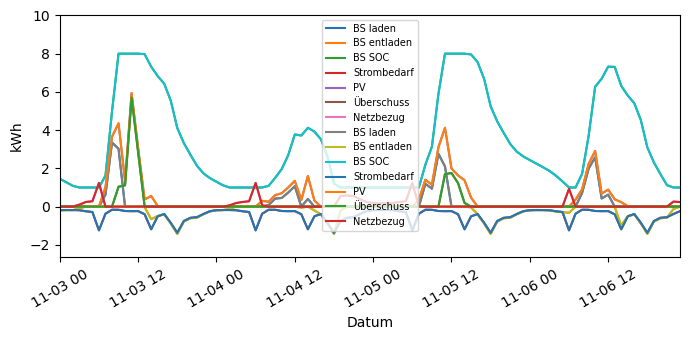

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.plot(df.index, df['battery_charge'], label = "BS laden")   
plt.plot(df.index, -df['battery_discharge'], label = "BS entladen")
plt.plot(df.index, df['battery_soc'], label = "BS SOC")
plt.plot(df.index, -df['Strombedarf'], label = "Strombedarf")
plt.plot(df.index, df['PV Ertrag'], label = "PV")
plt.plot(df.index, df['überschuss'], label = "Überschuss")
plt.plot(df.index, df['grid_import'], label = "Netzbezug")

plt.xlabel('Datum', fontsize=10)
plt.ylabel('kWh', fontsize=10)
plt.legend(fontsize = 7, loc = 'best')

plt.xticks(rotation=30, fontsize=10)
plt.xlim(pd.Timestamp('2014-11-03 00:00:00'), pd.Timestamp('2014-11-06 23:00:00'))
plt.show()  


In [48]:
netzbezug = df[df['grid_import'] > 1]
result_netzbezug = netzbezug[['grid_import']].copy()

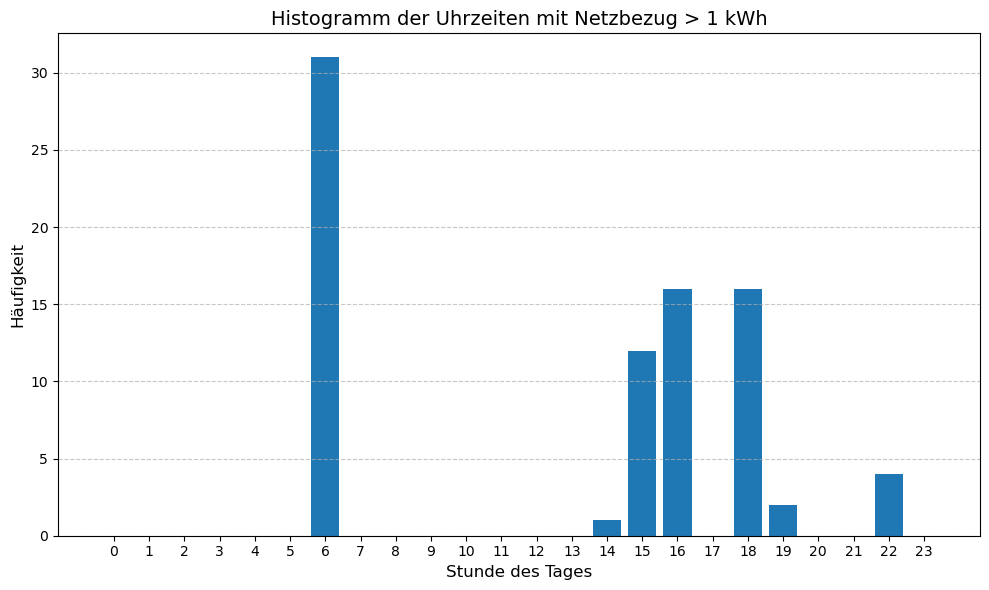

In [ ]:
# Histogramm 
# Extrahiere die Uhrzeiten (Stunde)
hours = result_netzbezug.index.hour
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

# Erstelle das Histogramm
plt.figure(figsize=(10, 6))
plt.hist(hours, bins=24, range=(0, 24), align='left', rwidth=0.8)

# Titel und Achsenbeschriftungen
plt.title('Histogramm der Uhrzeiten mit Netzbezug > 1 kWh', fontsize=14)
plt.xlabel('Stunde des Tages', fontsize=12)
plt.ylabel('Häufigkeit', fontsize=12)

# X-Achse für jede Stunde
plt.xticks(range(0, 24))

# Diagramm anzeigen
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

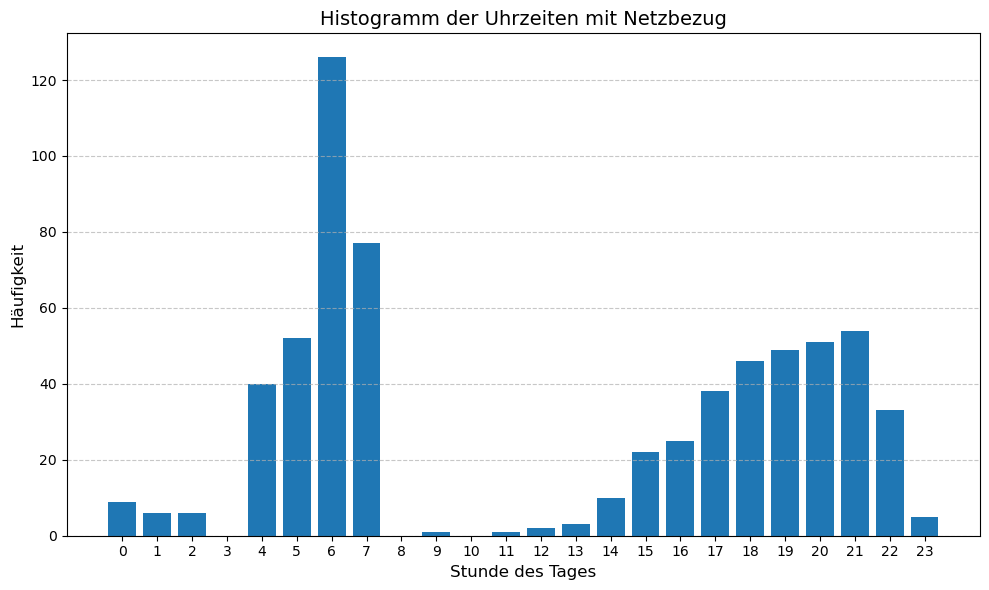

In [55]:
filtered_data = df[df['grid_import'] > 0.3]

# Extrahiere die Uhrzeiten (Stunde)
hours = filtered_data.index.hour
# Erstelle das Histogramm
plt.figure(figsize=(10, 6))
plt.hist(hours, bins=24, range=(0, 24), align='left', rwidth=0.8)

# Titel und Achsenbeschriftungen
plt.title('Histogramm der Uhrzeiten mit Netzbezug', fontsize=14)
plt.xlabel('Stunde des Tages', fontsize=12)
plt.ylabel('Häufigkeit', fontsize=12)

# X-Achse für jede Stunde
plt.xticks(range(0, 24))

# Diagramm anzeigen
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Annahme: Der DataFrame 'df' hat eine Spalte 'grid_import' und der Index ist 'timeindex'

# Filter: Netzbezug > 1 kWh
filtered = df['grid_import'] > 1

# Prüfen auf 3 aufeinanderfolgende Stunden
consecutive = filtered.rolling(window=2).sum() == 2

# Daten extrahieren, bei denen die Bedingung erfüllt ist
result = df[consecutive]


                     Strombedarf  Warmwasserbedarf  Heizwärmebedarf  \
Zeit                                                                  
2014-01-09 16:00:00     1.273204          0.115887         5.312007   
2014-01-21 16:00:00     1.273204          0.115887         5.312007   
2014-12-03 16:00:00     1.273204          0.115887         5.312007   
2014-12-04 16:00:00     1.273204          0.115887         5.312007   
2014-12-05 16:00:00     1.273204          0.115887         5.312007   
2014-12-06 16:00:00     1.273204          0.115887         5.312007   
2014-12-18 16:00:00     1.273204          0.115887         5.312007   
2014-12-19 16:00:00     1.273204          0.115887         5.312007   
2014-12-20 16:00:00     1.273204          0.115887         5.312007   
2014-12-21 19:00:00     1.010190          0.007106         4.075179   
2014-12-23 16:00:00     1.273204          0.115887         5.312007   
2014-12-24 16:00:00     1.273204          0.115887         5.312007   
2014-1

In [61]:
# BS 10
pv = pv_profil.get_pv_profil(40599, 2014, 10)
df_10 = lastprofile_VDI4655.get_lastprofile(14400,4000,1500,200,5,3)
df_10 = bs.mit_pv(df_10, pv, 10, 10)
ergebnisse_10 = bs.ersparnis(df_10, 10, 0.358)
bs.print_ersparnis(ergebnisse_10)

Jahresertrag in kWh:  11282
Eigenverbrauch in kWh:  3552
Geladene PV-Strom in Batteriespeicher in kWh:  1996
Direkter Verbrauch PV-Strom in kWh:  1556

Netzbezug in kWh:  449
Einspeisung ins Netz in kWh:  7571

Stromkosten ohne PV in €/a:  1432.25
Stromkosten mit PV & BS in €/a:  160.74
Einspeisevergütung in €/a:  602.65
Stromkosten Einsparung in €/a:  1874.16


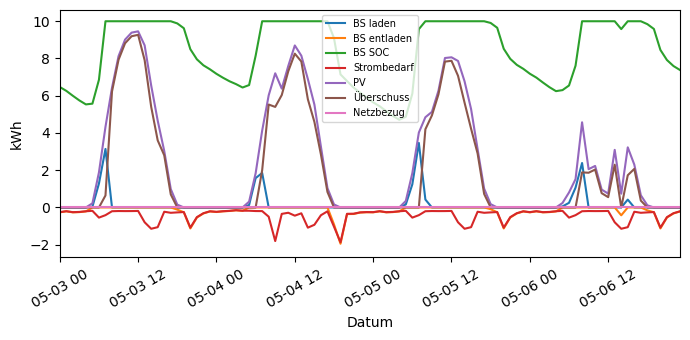

In [68]:
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.plot(df_10.index, df_10['battery_charge'], label = "BS laden")   
plt.plot(df_10.index, -df_10['battery_discharge'], label = "BS entladen")
plt.plot(df_10.index, df_10['battery_soc'], label = "BS SOC")
plt.plot(df_10.index, -df_10['Strombedarf'], label = "Strombedarf")
plt.plot(df_10.index, df_10['PV Ertrag'], label = "PV")
plt.plot(df_10.index, df_10['überschuss'], label = "Überschuss")
plt.plot(df_10.index, df_10['grid_import'], label = "Netzbezug")

plt.xlabel('Datum', fontsize=10)
plt.ylabel('kWh', fontsize=10)
plt.legend(fontsize = 7, loc = 'best')

plt.xticks(rotation=30, fontsize=10)
plt.xlim(pd.Timestamp('2014-05-03 00:00:00'), pd.Timestamp('2014-05-06 23:00:00'))
plt.show()  

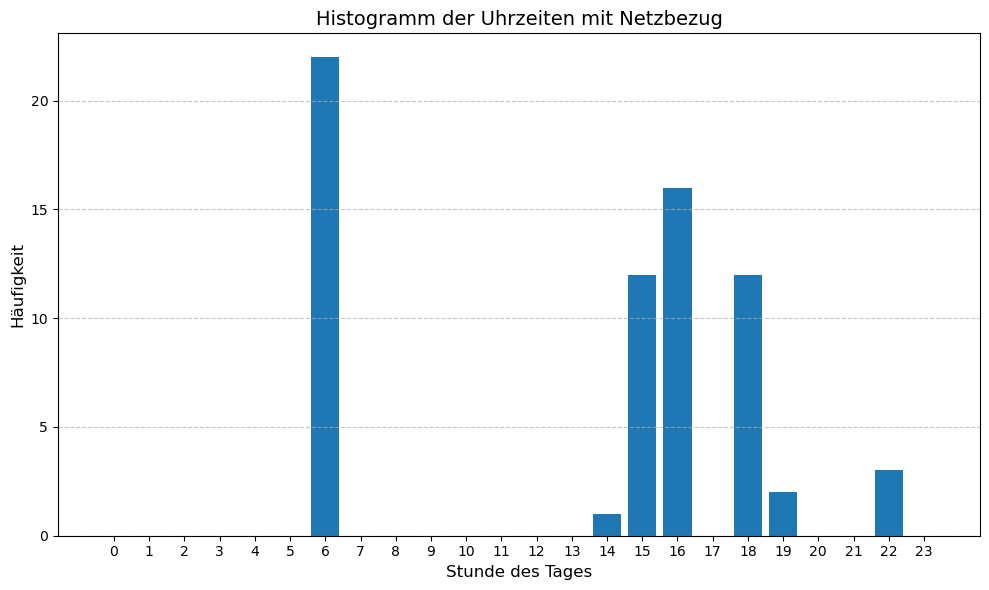

In [65]:
filtered_10 = df_10[df_10['grid_import'] > 1]

# Extrahiere die Uhrzeiten (Stunde)
hours = filtered_10.index.hour
# Erstelle das Histogramm
plt.figure(figsize=(10, 6))
plt.hist(hours, bins=24, range=(0, 24), align='left', rwidth=0.8)

# Titel und Achsenbeschriftungen
plt.title('Histogramm der Uhrzeiten mit Netzbezug', fontsize=14)
plt.xlabel('Stunde des Tages', fontsize=12)
plt.ylabel('Häufigkeit', fontsize=12)

# X-Achse für jede Stunde
plt.xticks(range(0, 24))

# Diagramm anzeigen
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()